In [4]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics


In [6]:
dataset =pd.read_csv("C:\\Users\\javith\\Downloads\\flightdata.csv")
dataset.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [3]:
dataset.drop('Unnamed: 25', axis = 1, inplace = True)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [5]:
df.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [9]:
dataset.dropna(subset=['DEP_TIME','ARR_DELAY'], inplace = True)

In [10]:
dataset.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                   0
DEP_DELAY                  0
DEP_DEL15                  0
CRS_ARR_TIME               0
ARR_TIME                   0
ARR_DELAY                  0
ARR_DEL15                  0
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME        0
DISTANCE                   0
Unnamed: 25            11043
dtype: int64

In [11]:
dataset.shape

(11043, 26)

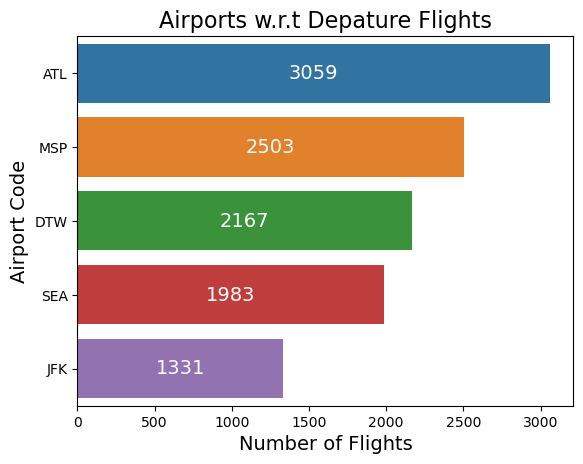

In [12]:
ax = sns.countplot(y = dataset['ORIGIN'], order = dataset['ORIGIN'].value_counts().index);
ax.set_title("Airports w.r.t Depature Flights", fontsize = 16);
ax.set_xlabel("Number of Flights", fontsize = 14);
ax.set_ylabel("Airport Code", fontsize = 14);
ax.bar_label(ax.containers[0], label_type = 'center', color = 'white', size = 14);

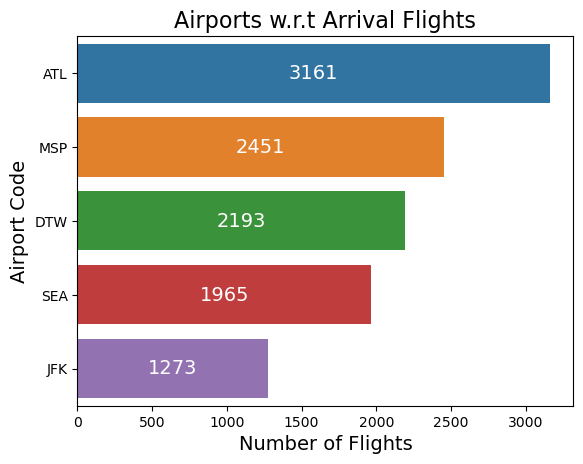

In [13]:
ax = sns.countplot(y = dataset['DEST'], order = dataset['DEST'].value_counts().index);
ax.set_title("Airports w.r.t Arrival Flights", fontsize = 16);
ax.set_xlabel("Number of Flights", fontsize = 14);
ax.set_ylabel("Airport Code", fontsize = 14);
ax.bar_label(ax.containers[0], label_type = 'center', color = 'white', size = 14);

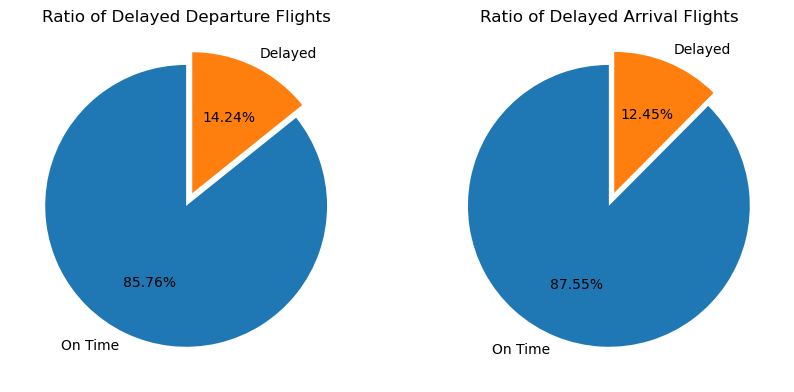

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (10,10))
ax[0].pie(dataset['DEP_DEL15'].value_counts(), labels = ['On Time', 'Delayed'], autopct = '%1.2f%%',startangle = 90, explode = (0,0.1));
ax[0].title.set_text("Ratio of Delayed Departure Flights");
ax[1].pie(dataset['ARR_DEL15'].value_counts(), labels = ['On Time','Delayed'], autopct = '%1.2f%%',startangle = 90, explode = (0,0.1));
ax[1].title.set_text("Ratio of Delayed Arrival Flights");

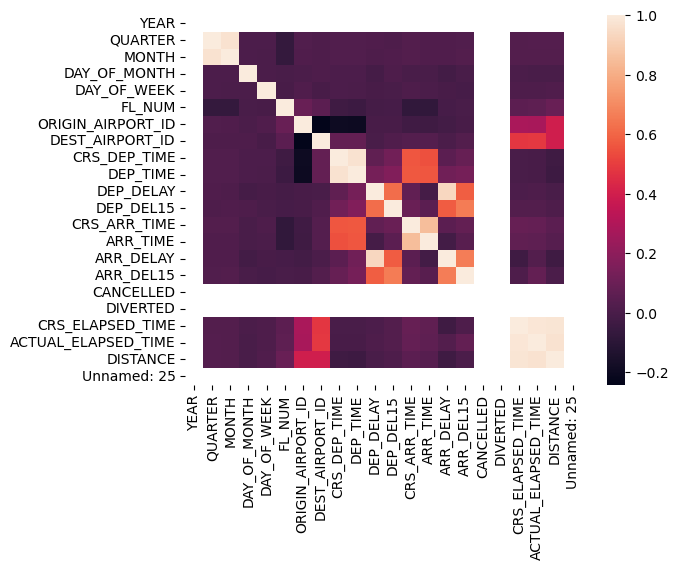

In [15]:
sns.heatmap(dataset.corr());

In [16]:
new_dataset = pd.get_dummies(dataset, columns = ['ORIGIN','DEST'])

In [17]:
new_dataset.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,...,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,2016,1,1,1,5,DL,N836DN,1399,10397,14747,...,1,0,0,0,0,0,0,0,0,1
1,2016,1,1,1,5,DL,N964DN,1476,11433,13487,...,0,1,0,0,0,0,0,0,1,0
2,2016,1,1,1,5,DL,N813DN,1597,10397,14747,...,1,0,0,0,0,0,0,0,0,1
3,2016,1,1,1,5,DL,N587NW,1768,14747,13487,...,0,0,0,0,1,0,0,0,1,0
4,2016,1,1,1,5,DL,N836DN,1823,14747,11433,...,0,0,0,0,1,0,1,0,0,0


In [18]:
X = new_dataset[['MONTH','DAY_OF_MONTH','DAY_OF_WEEK','ORIGIN_ATL','ORIGIN_DTW','ORIGIN_JFK','ORIGIN_MSP','ORIGIN_SEA','DEST_ATL','DEST_DTW','DEST_JFK','DEST_MSP','DEST_SEA','CRS_DEP_TIME','DEP_TIME','DEP_DEL15','CRS_ARR_TIME']]
y = new_dataset['ARR_DEL15']

In [19]:
X.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA,CRS_DEP_TIME,DEP_TIME,DEP_DEL15,CRS_ARR_TIME
0,1,1,5,1,0,0,0,0,0,0,0,0,1,1905,1907.0,0.0,2143
1,1,1,5,0,1,0,0,0,0,0,0,1,0,1345,1344.0,0.0,1435
2,1,1,5,1,0,0,0,0,0,0,0,0,1,940,942.0,0.0,1215
3,1,1,5,0,0,0,0,1,0,0,0,1,0,819,820.0,0.0,1335
4,1,1,5,0,0,0,0,1,0,1,0,0,0,2300,2256.0,0.0,607


In [20]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ARR_DEL15, dtype: float64

In [21]:
X.shape

(11043, 17)

In [22]:
y.shape

(11043,)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [24]:
from sklearn.tree import DecisionTreeClassifier
Classifier = DecisionTreeClassifier(max_depth = 4, min_samples_split = 4, random_state = 25)

In [25]:
Classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=4, random_state=25)

In [26]:
pred = Classifier.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.9172955025656505


In [28]:
Classifier.predict([[1,4,1,0,1,0,0,0,0,0,0,0,1,1215,1236,1,1420]])

C:\Users\javith\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1.])

In [29]:
import pickle
pickle.dump(Classifier, open('flightClassifier.pkl','wb'))